<a href="https://colab.research.google.com/github/suneshmc/EDA-project-on-hotel-booking-analysis/blob/main/EDA_on_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA PROJECT ON HOTEL BOOKING DATA ANALYSIS FOR CITY & RESORT HOTELS

**This data collection includes booking details for a city hotel and a resort hotel, as well as details like the date the appointment was made, the duration of the stay, the number of adults, kids, and/or babies, and the number of parking spaces that are available.**

#Importing the required Libraries of Python
*  Pandas
*  Numpy
*  Matplotlib
*  seaborn




 



In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
%matplotlib inline
import seaborn as sbr
file_path="/content/Hotel Bookings.csv"

Assigning the file path

In [4]:
df= pd.read_csv(file_path)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,6,7,9,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# rows and columns in the file 
df.shape


(43619, 32)

#Rectifying spelling mistakes in the data 

In [5]:

temp=df['hotel'].values.tolist()
for x in temp:
  if (x=='City Hotel') or (x=='Resort Hotel'):
    continue
  else:
    y = '3'
    if len(x) == 10:
      y = x
    elif len(x) == 12  :
      z = x
    df["hotel"].replace({ y : "City Hotel", z : "Resort Hotel"}, inplace=True)

In [ ]:
'''df[["day", "month", "year"]] = df["reservation_status_date"].str.split("-", expand = True)
df['reservation_status_date'].value_counts()
year=df['year'].values.tolist()
month=df['month'].values.tolist()
yrmn ={}
for yr in year:
  for mn in month:
    df[(df[year] == yr) & (df[month] == mn )]'''
data = df[(pd.Series(pd.DatetimeIndex(df['reservation_status_date']).year).isin([2014]) & pd.Series(pd.DatetimeIndex(df['reservation_status_date']).quarter).isin([1,3]))]
print(data)

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

[0 rows x 32 columns]


In [5]:
#checking 10 rowa
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,03-07-2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,03-07-2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0.0,Transient,107.0,0.0,0.0,Check-Out,03-07-2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0.0,Transient,103.0,0.0,1.0,Check-Out,03-07-2015
8,ReSort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0.0,Transient,82.0,0.0,1.0,Canceled,06-05-2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0.0,Transient,105.5,0.0,0.0,Canceled,22-04-2015


In [6]:
#Finding data types non null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43686 entries, 0 to 43685
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           43686 non-null  object 
 1   is_canceled                     43686 non-null  int64  
 2   lead_time                       43686 non-null  object 
 3   arrival_date_year               43686 non-null  int64  
 4   arrival_date_month              43686 non-null  object 
 5   arrival_date_week_number        43686 non-null  int64  
 6   arrival_date_day_of_month       43686 non-null  object 
 7   stays_in_weekend_nights         43686 non-null  object 
 8   stays_in_week_nights            43686 non-null  int64  
 9   adults                          43686 non-null  object 
 10  children                        43686 non-null  int64  
 11  babies                          43684 non-null  float64
 12  meal                            

In [7]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined', '0'], dtype=object)

In [8]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017,    0])

In [11]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', '0', 'Undefined'], dtype=object)

#Duplicates found in the data 

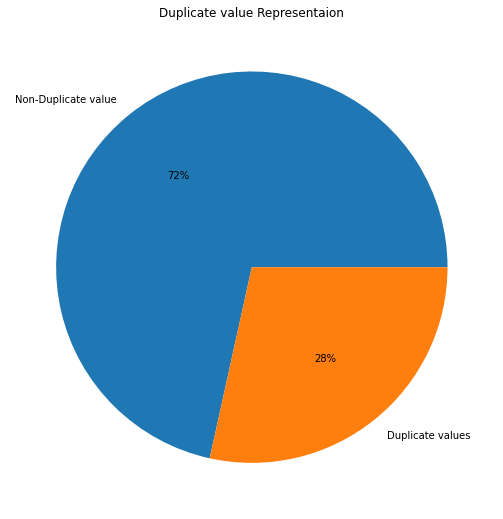

In [8]:
sunesh=df.duplicated().value_counts().tolist()
title = ['Non-Duplicate value','Duplicate values']
fig = plot.figure(figsize = (15,9))
plot.pie(sunesh, labels=title,autopct='%1.0f%%')
plot.title("Duplicate value Representaion")
plot.show()

In [5]:
#Duplicates removed
df=df.drop_duplicates()

In [9]:
#Describe by mean SD and min snd max 25% ,50%,75%,
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [10]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS', nan],
      dtype=object)

#Frequency of adult, children & babies

In [10]:
df['children'].value_counts().reset_index()

,index,children
0,0.0,79028
1,1.0,4695
2,2.0,3593
3,3.0,75
4,10.0,1


In [10]:
df['adults'].value_counts().reset_index()[:10]

,index,adults
0,2.0,51321
1,1.0,11816
2,3.0,2638
3,0.0,141
4,4.0,36
5,26.0,5
6,27.0,2
7,20.0,2
8,5.0,2
9,40.0,1


In [12]:
df['babies'].value_counts().reset_index()

,index,babies
0,0,86482
1,1,897
2,2,15
3,10,1
4,9,1


In [48]:
df.hotel.value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

In [23]:
#bookings_by_months_df=df.groupby(['arrival_date_year','arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
#print(bookings_by_months_df)
#type(bookings_by_months_df)

14917
119390


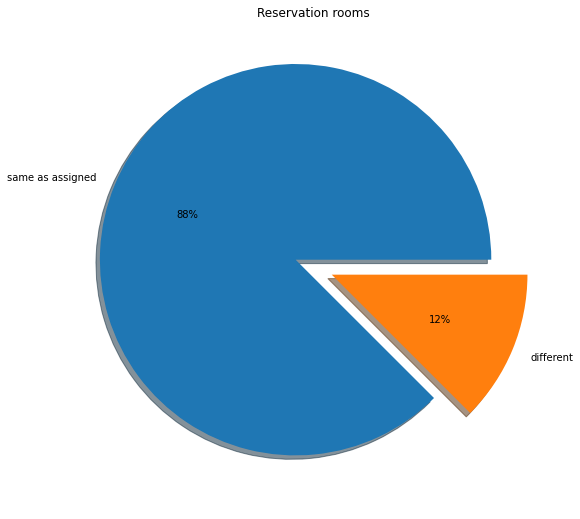

In [21]:
from os import cpu_count
#pie chart of people who got 
res=df["reserved_room_type"].tolist()
ass=df["assigned_room_type"].tolist()
type(res)
type(ass)
#for b in df
count = 0
#for i in range(len(res)):
  #if res[i]!=ass[i]:
    #count+=1
for x in range(len(res)):
  if res[x]!=ass[x]:
    count+=1
print(count)
print(len(res))
#print(str((count/len(res))*100)+'%')
chart = [len(res)-count, count]
fig = plot.figure(figsize = (15,9))
titel = ['same as assigned','different']
plot.pie(chart, labels=titel, explode = [0.1,0.1],autopct='%1.0f%%', shadow =  True)
plot.title("Reservation rooms")
plot.show()

#Meals prefered by the guest

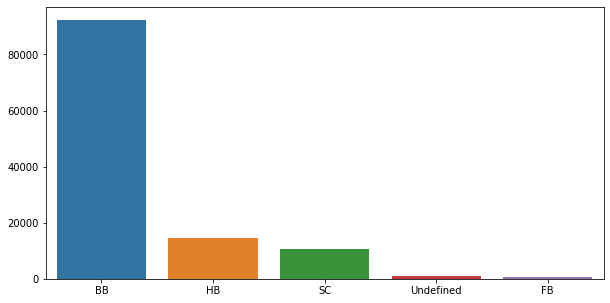

In [12]:
dmeal=df['meal'].value_counts().tolist()
title =df['meal'].value_counts().index.tolist()
#fig = plot.figure(figsize = (15,9))
#plot.pie(dmeal, labels=title,shadow= True, explode=[0.1,0.1,0.1,0.1,0.2])
#plot.title("Duplicate")
#plot.show()
plot.figure(figsize = (10,5))
sbr.barplot(x = title, y = dmeal)
plot.show()

#Hotel booking channels

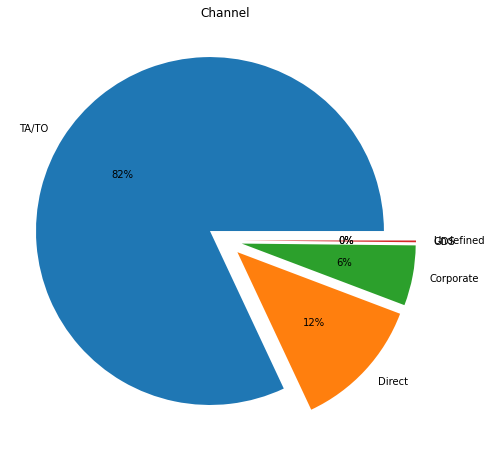

In [22]:
modeof_bk=df['distribution_channel'].value_counts().tolist()
#print(modeof_bk)
title =df['distribution_channel'].value_counts().index.tolist()
fig = plot.figure(figsize = (18,8))
plot.pie(modeof_bk, labels=title, autopct='%1.0f%%',explode=[0.1,0.1,0.1,0.1,0.1])
plot.title("Channel")
plot.show()

In [54]:
#peeps=df.groupby(['adults','children','babies'])['hotel'].value_counts().reset_index
baby=df.groupby(['babies'])['hotel'].count().reset_index
print(baby)

<bound method Series.reset_index of babies
0     86482
1       897
2        15
9         1
10        1
Name: hotel, dtype: int64>


#Average daily rate throughout months




Text(0, 0.5, 'ADR')

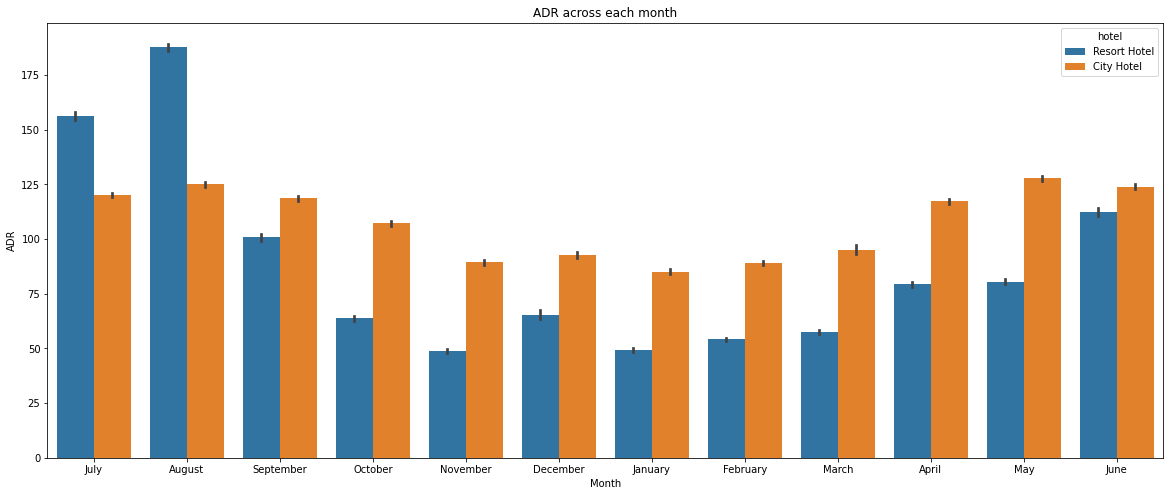

In [20]:
plot.figure(figsize=(20,8))
#sbr.lineplot(x=df['arrival_date_month'],y=df['adr'],hue=df['hotel'])
sbr.barplot(x=df['arrival_date_month'],y=df['adr'],hue=df['hotel'])
plot.title('ADR across each month')
plot.xlabel('Month')
plot.ylabel('ADR')

#Country origin of the guest

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

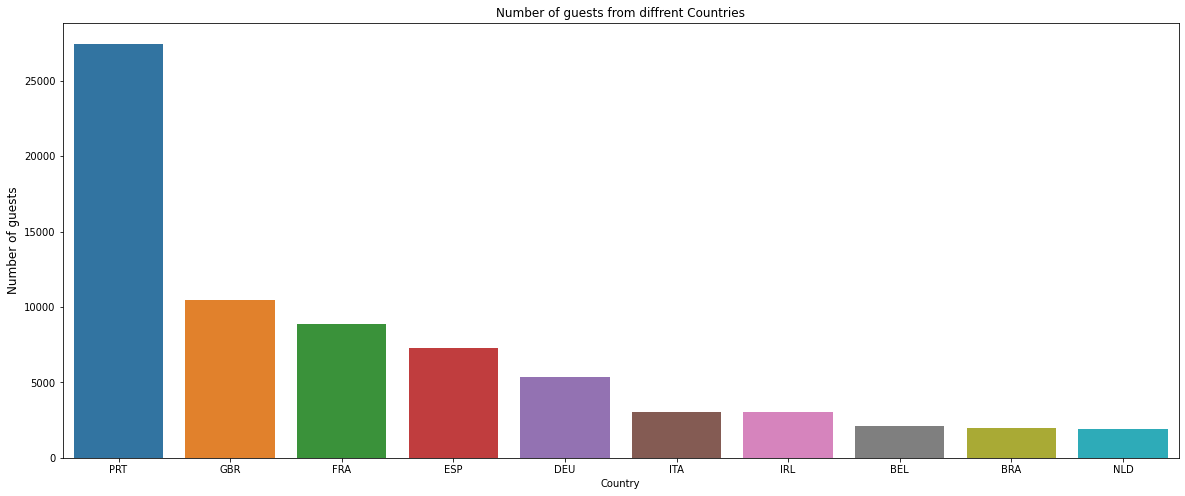

In [21]:
country_df=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count_of_guests'})[:10]
plot.figure(figsize=(20,8))
sbr.barplot(x=country_df['country'],y=country_df['count_of_guests'])
plot.xlabel('Country')
plot.ylabel('Number of guests',fontsize=12)
plot.title("Number of guests from diffrent Countries")

#MAP REPRESENTATION OF GUEST'S COUNTRY

In [6]:
#Importing plotly for representaion
import plotly.express
country_df=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count_of_guests'})[:10]
guests_map = plotly.express.choropleth(country_df, locations = country_df['country'],color = country_df['count_of_guests'], hover_name = country_df['country'])
guests_map.show()